In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap
from collections import Counter
from sklearn import preprocessing
import numpy as np
import math
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_yticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_yticklabels(labels, rotation=0)

In [3]:
df = pd.read_csv('./heatmap_cons.csv')
df = df.replace(['group_05', 'group_06', 'group_07', 'group_08', 'group_09', 'group_10', 'group_11', 'group_12', 
                'group_13', 'group_14', 'group_15', 'group_16', 'group_17', 'group_18', 'group_19', 'group_20', 
                'group_21', 'group_22', 'group_23', 'group_24', 'group_25', 'group_26', 'group_27', 'group_28', 
                'group_29', 'group_30', 'group_31', 'group_32'],
               ['marchands', 'boulangers', 'bouchers', 
                'tonneliers', 'drapiers', 'tanneurs', 
                'cabaretiers', 'maçons', 'forgerons', 
                'tailleurs', 'bateliers', 'pelletiers', 
                'charpentiers', 'crieurs et mesureurs de vin', 
                'cordonniers', 'orfèvres', 'marchands de grains', 
                'jardiniers', 'pêcheurs', 'barbiers et baigneurs', 
                'sauniers', 'tisserands', 'gourmets et courtiers', 
                'charrons', 'regrattiers, cordiers et fruitiers', 
                'coltineurs de tonneaux', 'constructeurs de bateaux', 
                'huiliers meuniers et tondeurs de draps'])
columns = df['date'].sort_values().unique()
index = df['represents'].sort_values().unique()
df2 = pd.DataFrame(index=index, columns=columns)
for element in index :
    sub_df = df.loc[df['represents'] == element]
    for index, row in sub_df.iterrows() :
        df2.loc[row['represents'], row['date']] = row['authority']
        
df_out = df2
for index, row in df2.iterrows():
    ls_count =[]
    for element in df2.columns.to_list(): 
        to_count = df2.loc[index][element]
        #print(to_count)
        if type(to_count) != str :
            df_out.loc[index][element] = 0
        else:
            ls_count.append(to_count)
            decompte = Counter(ls_count)
            df_out.loc[index][element] = decompte[to_count]

In [4]:
df_out_notnorm = df_out.astype(float)
df_out_notnorm['mean'] = df_out_notnorm.mean(axis=1)
df_out_notnorm = df_out_notnorm.sort_values(by=['mean'])
df_out_notnorm = df_out_notnorm.drop(columns='mean')
df_out_notnorm

,1400,1401,1402,1403,1404,1405,1406,1408,1409,1410,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
huiliers meuniers et tondeurs de draps,1.0,1.0,2.0,2.0,3.0,3.0,1.0,1.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
barbiers et baigneurs,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"regrattiers, cordiers et fruitiers",1.0,1.0,1.0,1.0,2.0,1.0,2.0,3.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
crieurs et mesureurs de vin,1.0,1.0,2.0,1.0,3.0,1.0,0.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
coltineurs de tonneaux,1.0,1.0,1.0,2.0,1.0,3.0,2.0,1.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pêcheurs,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,...,4.0,1.0,2.0,1.0,2.0,5.0,6.0,1.0,2.0,3.0
orfèvres,1.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0,...,3.0,3.0,4.0,1.0,2.0,5.0,1.0,1.0,2.0,3.0
maçons,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,3.0,4.0,1.0,2.0,3.0,4.0,1.0,2.0,2.0,3.0
tailleurs,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,...,2.0,3.0,4.0,2.0,3.0,3.0,4.0,1.0,2.0,4.0
gourmets et courtiers,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,...,1.0,1.0,3.0,4.0,1.0,2.0,1.0,2.0,2.0,3.0


In [5]:
#df_out = df_out.astype(float)
#df_out_norm = (df_out-df_out.mean())/df_out.std(axis=0)

x = df_out.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_out_norm = pd.DataFrame(x_scaled, index = df_out.index, columns = df_out.columns)
df_out_norm['mean'] = df_out_norm.mean(axis=1)
df_out_norm = df_out_norm.sort_values(by=['mean'])
df_out_norm = df_out_norm.drop(columns='mean')

In [6]:
df_out_norm

,1400,1401,1402,1403,1404,1405,1406,1408,1409,1410,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
barbiers et baigneurs,0.0,0.0,0.0,0.0,0.0,0.5,0.333333,0.000000,0.0,0.00,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
huiliers meuniers et tondeurs de draps,0.0,0.0,1.0,1.0,1.0,1.0,0.333333,0.000000,0.5,0.75,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
"regrattiers, cordiers et fruitiers",0.0,0.0,0.0,0.0,0.5,0.0,0.666667,0.666667,0.0,0.00,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
crieurs et mesureurs de vin,0.0,0.0,1.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.25,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
pêcheurs,0.0,0.0,0.0,0.0,0.5,0.0,0.666667,0.333333,0.0,0.00,...,0.444444,0.1,0.333333,0.071429,0.133333,0.454545,1.000000,0.142857,0.222222,0.3
maçons,0.0,0.0,0.0,0.0,0.5,0.0,0.333333,0.333333,0.5,0.25,...,0.333333,0.4,0.166667,0.142857,0.200000,0.363636,0.166667,0.285714,0.222222,0.3
orfèvres,0.0,0.0,0.0,0.0,0.5,0.0,0.333333,0.666667,0.5,0.00,...,0.333333,0.3,0.666667,0.071429,0.133333,0.454545,0.166667,0.142857,0.222222,0.3
tailleurs,0.0,0.0,0.0,0.0,0.0,0.5,0.333333,0.000000,0.5,0.00,...,0.222222,0.3,0.666667,0.142857,0.200000,0.272727,0.666667,0.142857,0.222222,0.4
gourmets et courtiers,0.0,0.0,0.0,0.0,0.0,0.5,0.666667,0.000000,0.5,0.00,...,0.111111,0.1,0.500000,0.285714,0.066667,0.181818,0.166667,0.285714,0.222222,0.3
charpentiers,0.0,0.0,0.0,1.0,0.0,0.5,0.333333,0.000000,0.5,0.50,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


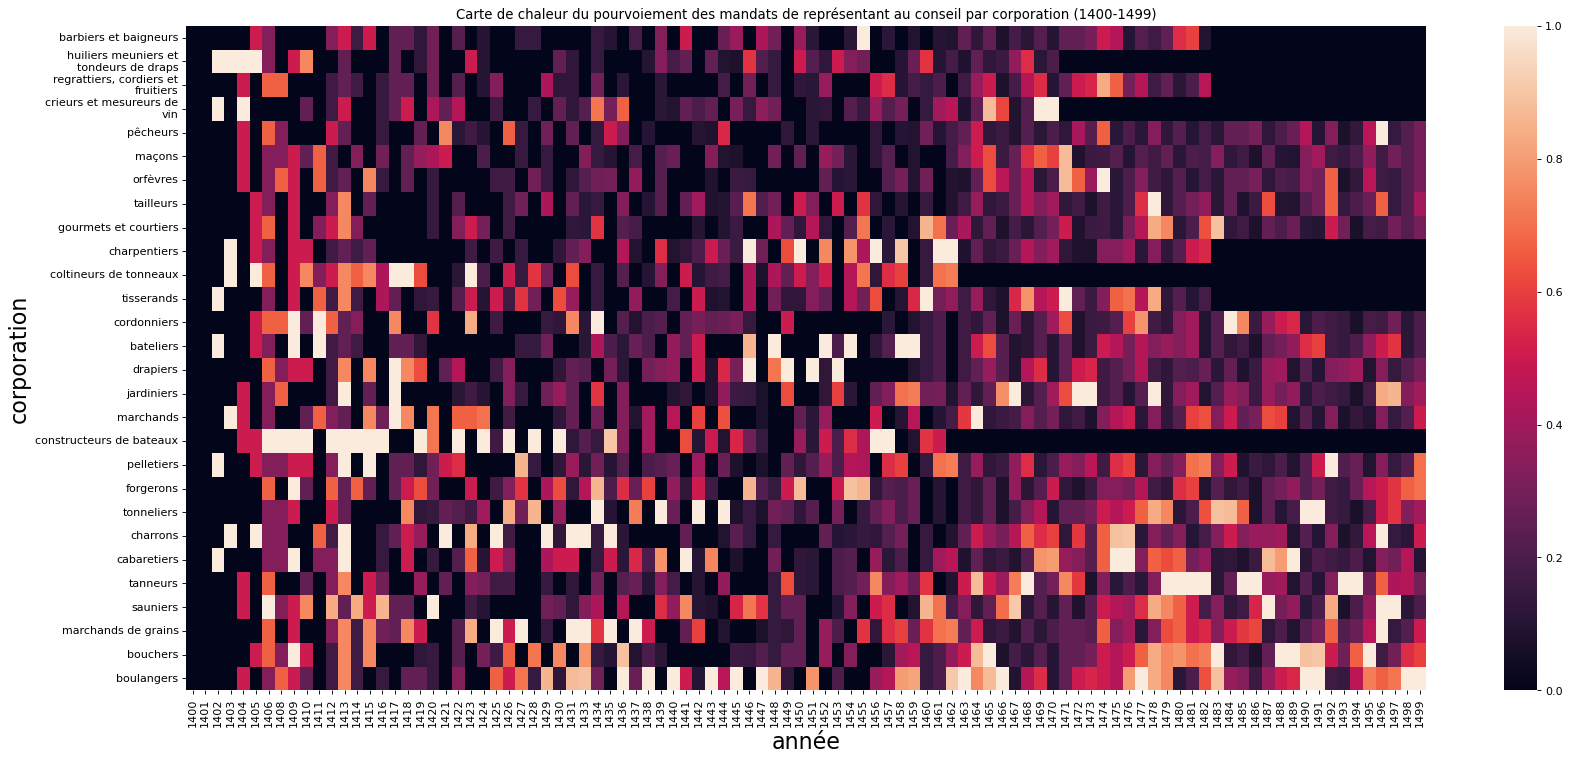

In [7]:
plt.figure(figsize=(25, 11), dpi=80)
heat = sns.heatmap(df_out_norm, vmin=0, vmax=1)

heat.set_title("Carte de chaleur du pourvoiement des mandats de représentant au conseil par corporation (1400-1499)", loc='center')
heat.set_xlabel("année", fontsize = 20)
heat.set_ylabel("corporation", fontsize = 20)
wrap_labels(heat, 25)
fig = heat.get_figure()
fig.savefig('./Images/heatmapXV.svg', format='svg',bbox_inches='tight')

In [8]:
df_out_norm = df_out_norm.round(decimals=4)
df_out_norm

,1400,1401,1402,1403,1404,1405,1406,1408,1409,1410,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
barbiers et baigneurs,0.0,0.0,0.0,0.0,0.0,0.5,0.3333,0.0000,0.0,0.00,...,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
huiliers meuniers et tondeurs de draps,0.0,0.0,1.0,1.0,1.0,1.0,0.3333,0.0000,0.5,0.75,...,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
"regrattiers, cordiers et fruitiers",0.0,0.0,0.0,0.0,0.5,0.0,0.6667,0.6667,0.0,0.00,...,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
crieurs et mesureurs de vin,0.0,0.0,1.0,0.0,1.0,0.0,0.0000,0.0000,0.0,0.25,...,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
pêcheurs,0.0,0.0,0.0,0.0,0.5,0.0,0.6667,0.3333,0.0,0.00,...,0.4444,0.1,0.3333,0.0714,0.1333,0.4545,1.0000,0.1429,0.2222,0.3
maçons,0.0,0.0,0.0,0.0,0.5,0.0,0.3333,0.3333,0.5,0.25,...,0.3333,0.4,0.1667,0.1429,0.2000,0.3636,0.1667,0.2857,0.2222,0.3
orfèvres,0.0,0.0,0.0,0.0,0.5,0.0,0.3333,0.6667,0.5,0.00,...,0.3333,0.3,0.6667,0.0714,0.1333,0.4545,0.1667,0.1429,0.2222,0.3
tailleurs,0.0,0.0,0.0,0.0,0.0,0.5,0.3333,0.0000,0.5,0.00,...,0.2222,0.3,0.6667,0.1429,0.2000,0.2727,0.6667,0.1429,0.2222,0.4
gourmets et courtiers,0.0,0.0,0.0,0.0,0.0,0.5,0.6667,0.0000,0.5,0.00,...,0.1111,0.1,0.5000,0.2857,0.0667,0.1818,0.1667,0.2857,0.2222,0.3
charpentiers,0.0,0.0,0.0,1.0,0.0,0.5,0.3333,0.0000,0.5,0.50,...,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0


<Figure size 800x560 with 0 Axes>

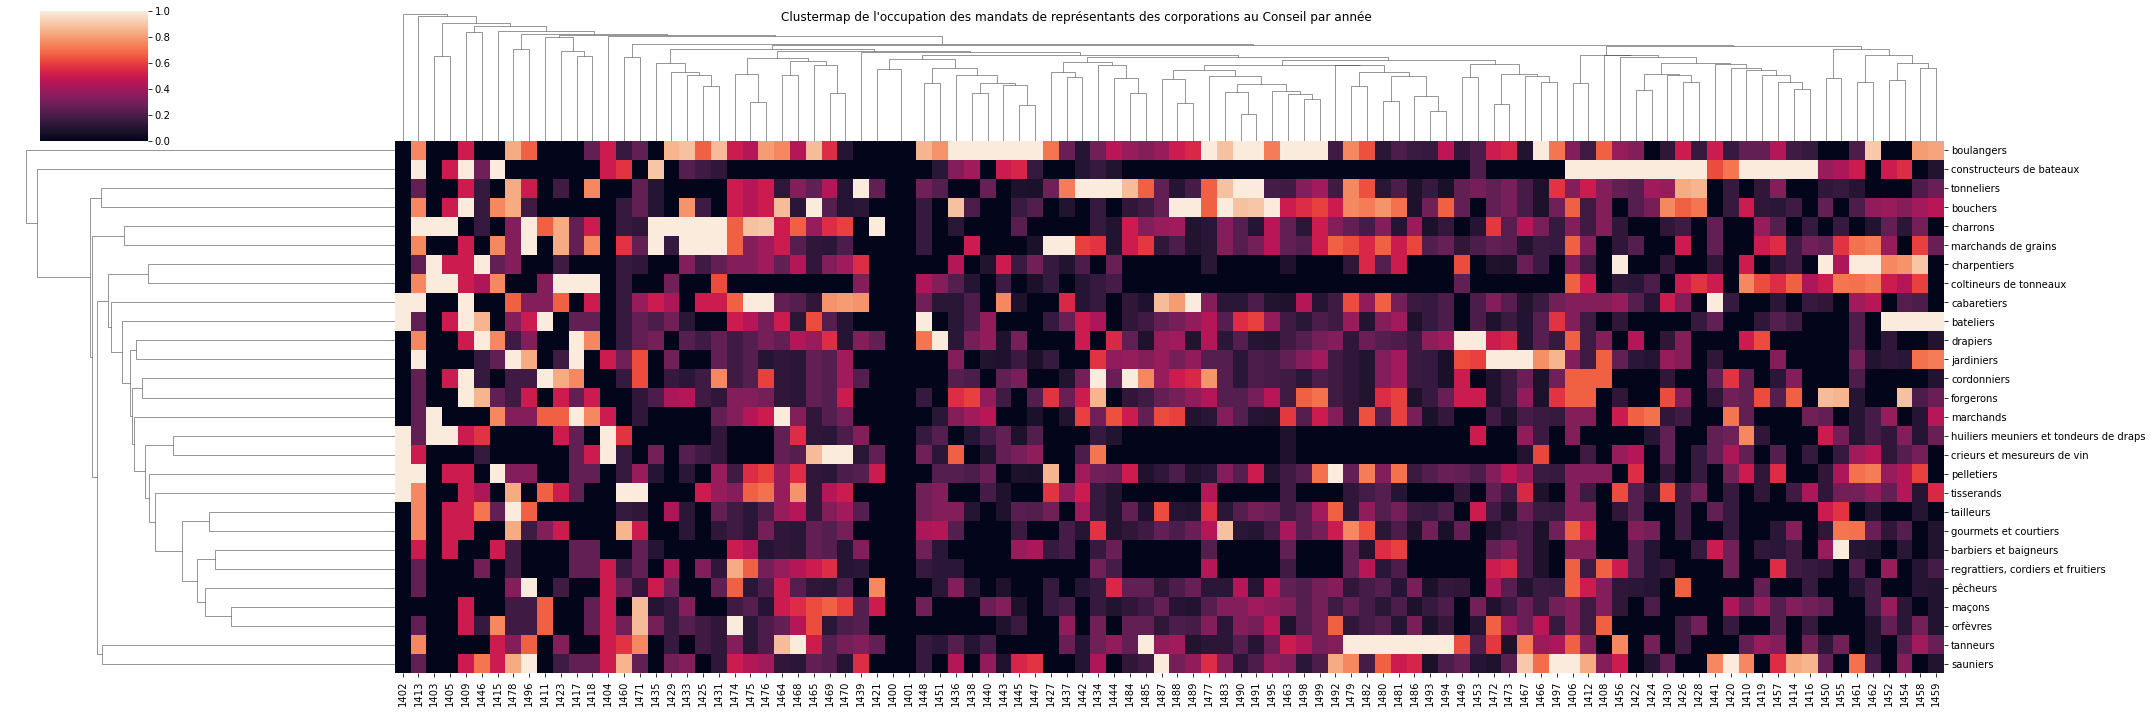

In [12]:
#df_out_norm = df_out_norm.round(decimals=4)
plt.figure(figsize=(10, 7), dpi=80) 

clustermap = sns.clustermap(df_out_norm, figsize=(30, 10)).fig.suptitle("Clustermap de l'occupation des mandats de représentants des corporations au Conseil par année")
plt.show()
fig = clustermap.get_figure()
fig.savefig('./Images/ClustermapXV.svg', format='svg',bbox_inches='tight')

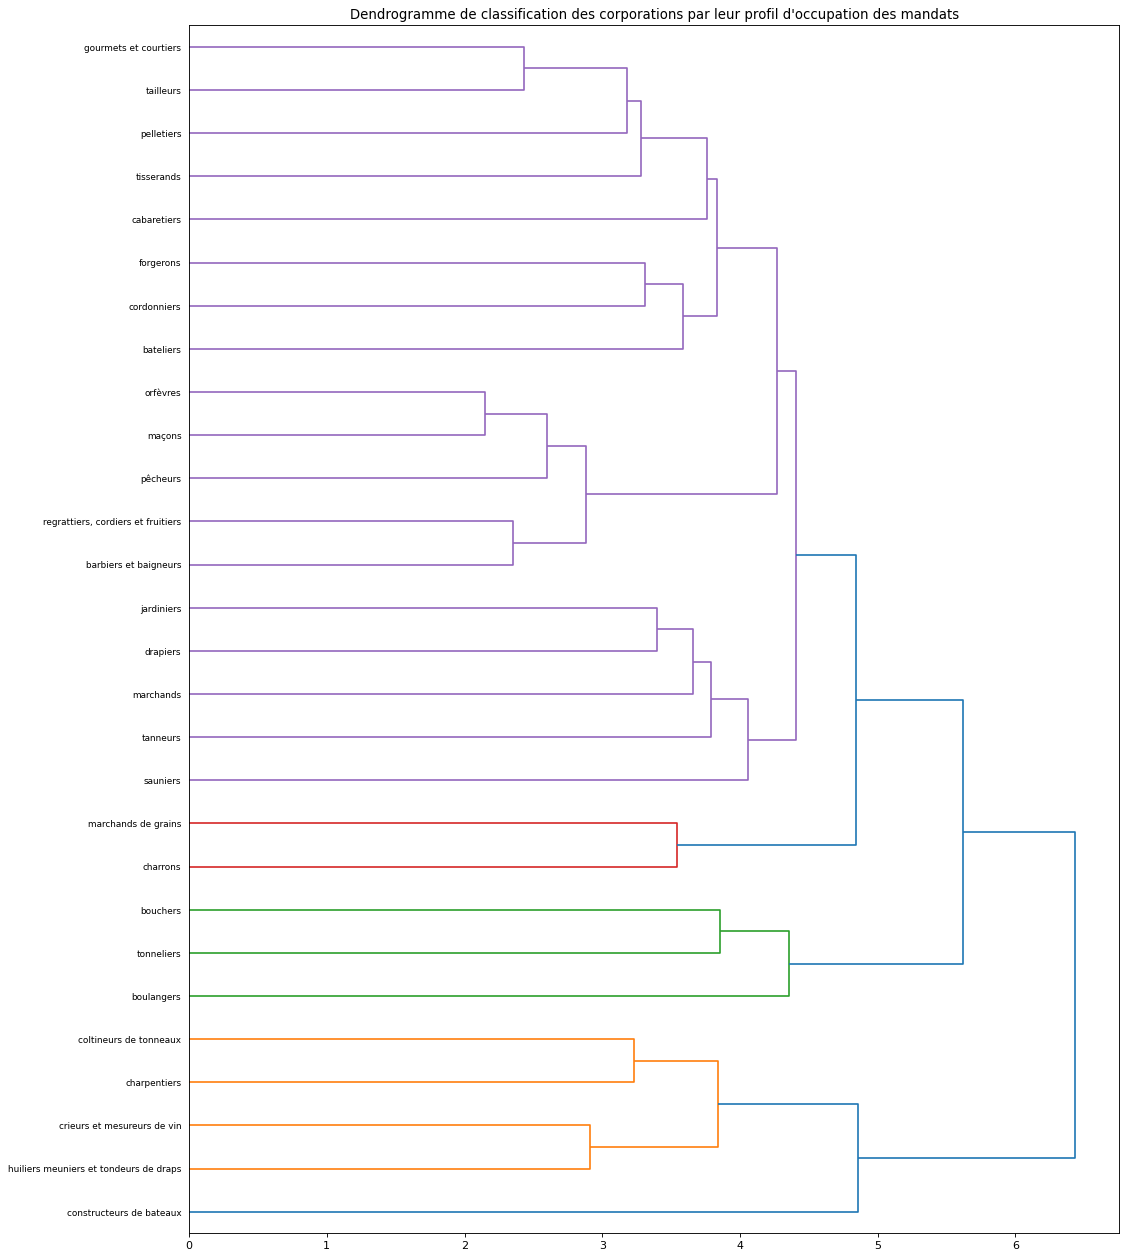

In [34]:
Z = linkage(df_out_norm, 'ward')
plt.figure(figsize=(15, 20), dpi=80)
plt.title("Dendrogramme de classification des corporations par leur profil d'occupation des mandats")
dend = dendrogram(Z, leaf_font_size=8, labels=df_out_norm.index, orientation = 'right')
plt.savefig('./Images/dend_XV.svg', format='svg',bbox_inches='tight')